<h1 style="text-align:center;">Insights into World Population, CO2 Emissions and Life Expectancy from 1970 to 2020</h1>

**Introduction to Coding and Data Management**: Module II

**Name**: Nicolò Garavello                                                                                
**Matricula number**: 899231

----

## Introduction

### Objectives

The main goal of the research is to study the changes in population, CO2 emissions and life expectancy between 1970 and 2020, focusing both on world data as well as on data divided and grouped by continent and country. Another important key aspect is the worldwide correlation between population and CO2 emissions, whereas the correlation among all three factors will be analyzed narrowing it down to the three most populated countries based on latest data available. To reach these goals, over the course of the research the information will be presented to the reader in different forms, using numbers, statistics, graphs and maps, increasing comprehension and clarity.

At the end of the research the reader will be able to answer to three well-defined questions, these are:
1. <span style="color:green">Which were the main changes in world population from 1970 to 2020?</span>
2. <span style="color:blue">Is there a correlation between population and CO2 emissions?</span>
3. <span style="color:orange">How did life expectancy change in relation to population and CO2 emissions in the three most populated countries as of 2020: China, India and United States?</span>

As it can be seen, to enhance clarity three different colors were chosen to represent each question. By highlight the main conclusions of the research the reader will be able to easily skip to the final parts as preferred.

### Datasets choice

To address the answers we have defined and discussed above, three datasets were chosen. All datasets were downloaded from the website https://kaggle.com, which provides a vast collection of datasets as well as several other resources. While searching for the datasets these were filtered only by those containing a csv file with a usability rate of 10.00.

1. *d1_world_population.csv*: this is the main dataset chosen for the research, the sources are reliable considering that the data come from the United Nations website and from the United States Census Bureau, two well-renowned institutions.
2. *d2_CO2_emissions.csv*: this is the second dataset containing information regarding CO2 emissions, the data are reliable and updated every year, they come from the World Health Organization website.
3. *d3_life_expectancy.csv*: the last dataset containing information about life expectancy for a series of country, the data come from the Nasdaq Database, a famous well-grounded source for thousands of datasets. 

Links to download the three datasets:

- https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset
- https://www.kaggle.com/datasets/moazzimalibhatti/co2-emission-by-countries-year-wise-17502022
- https://www.kaggle.com/datasets/ulrikthygepedersen/life-expectancy

### Disclaimer

All the codes inside the research were written personally. In case there were not enough information on the files shared on moodle, to write and conclude some of the codes the original documentation was consulted, as well as other reliable websites and/or online posts.

Sources:

- https://www.python.org/doc/
- https://pandas.pydata.org/docs/
- https://www.w3schools.com
- https://www.geeksforgeeks.org

----

## Project overview

### Part 0 Setting the system
- Installing libraries
- Importing libraries

### Part 1 Data cleansing
- 1.1 Importing
- 1.2 Preview
- 1.3 Cleaning
    - First dataset: Population
    - Second dataset: CO2 emissions
    - Working together
    - Third dataset: Life expectancy
    - Final view of the cleaned DataFrames
- 1.4 Merging 

### Part 2 Data analysis and visualization
- 2.1 Addressing our first dilemma: Which were the main changes in world population from 1970 to 2020?
- 2.2 Addressing our second dilemma: Is there a correlation between population and CO2 emissions?
- 2.3 Addressing our third dilemma: How did life expectancy change in relation to population and CO2 emissions in the three most populated countries as of 2020: China, India and United States?

### Part 3 Conclusion

----

## Part 0 Setting the system

The initial step is to set our system by installing and importing all the libraries and modules needed to perform the codes inside the research and to carry out our program as a whole.

### Installing libraries

First, we install the required libraries using the command `pip install`, in case these are not present in the system. The `%` command is used so we can install all the libraries in a single cell.

In [2]:
%pip install pandas numpy seaborn matplotlib plotly geopandas

Note: you may need to restart the kernel to use updated packages.


### Importing libraries

Now that we have installed the libraries, we can start importing them.

Note that in this section the descriptions of the imported libraries and modules are omitted, considering that throughout the research these will be listed before a specific line of code or before defining a function, ensuring that the reader will be able to understand why each library and module was imported and what it is used for.

In [3]:
import os
import os.path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # here we import the pyplot module from the matplotlib library
import plotly.express as px # here we import the express module from the plotly library
import plotly.graph_objects as go # here we import the graph_objects module from the plotly library
import geopandas as gpd

----

## Part 1 Data cleansing

### 1.1 Importing

Let's begin by importing all the three needed datasets.

We rely on two methods that come from the `os` module: `os.getcwd()`, which returns the current working directory, and `os.listdir()`, used to get the list of all the files in a specified directory.

In [4]:
current_directory = os.getcwd() # getting the current working directory
print(current_directory)

/Users/nicologaravello/Desktop/ICDM_Module_2_Garavello_899231


In [5]:
files_in_directory = os.listdir(current_directory) # we check the files inside the current directory
print(files_in_directory)

['maps', '.DS_Store', 'datasets', '__pycache__', '.ipynb_checkpoints', 'ICDM_Module_2_Garavello_899231.ipynb']


Let's check the files inside "datasets".

In [6]:
files_in_datasets = os.listdir('datasets')
print(files_in_datasets)

['.DS_Store', 'd3_life_expectancy.csv', 'd2_CO2_emission.csv', 'd1_world_population.csv']


Three csv files are present inside the folder "datasets", we import these files using the function `pd.read_csv()`, which comes from the library `pandas`.

Note that we set the parameter `encoding=` to `latin1` to import and read the csv file "d2_CO2_emission.csv" since otherwise we would have encountered the error: `UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 150: invalid start byte`. This was probably due to some special character inside the csv file "d2_CO2_emission.csv" for which it made it impossible to read it using the standard UTF-8 format.

In [7]:
population = pd.read_csv('datasets/d1_world_population.csv')
emissions = pd.read_csv('datasets/d2_CO2_emission.csv', encoding='latin1')
expectancy = pd.read_csv('datasets/d3_life_expectancy.csv')

Moreover, it should also be noted that in this section we only imported the datasets, we are going to import a shapefile later in the research (see Part 2 Section 2.1).

### 1.2 Preview

Now that the we have imported the required datasets, let's get a preview of them.

We use the attribute `.columns` from the `pandas` library to access the column labels of a specified DataFrame, whereas we use the method `.info()`, which still comes from `pandas`, to provide a variety of information regarding a DataFrame, such as the names and number of columns as well as their data types.

In [14]:
population

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [15]:
population.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [16]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [17]:
emissions

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²


In [18]:
emissions.columns

Index(['Country', 'Code', 'Calling Code', 'Year', 'CO2 emission (Tons)',
       'Population(2022)', 'Area', '% of World', 'Density(km2)'],
      dtype='object')

In [19]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [20]:
expectancy

,country_code,country_name,year,value
0,ABW,Aruba,1960,64.152
1,ABW,Aruba,1961,64.537
2,ABW,Aruba,1962,64.752
3,ABW,Aruba,1963,65.132
4,ABW,Aruba,1964,65.294
...,...,...,...,...
15201,ZWE,Zimbabwe,2016,60.306
15202,ZWE,Zimbabwe,2017,60.709
15203,ZWE,Zimbabwe,2018,61.414
15204,ZWE,Zimbabwe,2019,61.292


In [21]:
expectancy.columns

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

In [22]:
expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15206 entries, 0 to 15205
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  15206 non-null  object 
 1   country_name  15206 non-null  object 
 2   year          15206 non-null  int64  
 3   value         15206 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 475.3+ KB


### 1.3 Cleaning

Let's clean the data.

**First dataset: Population**

Starting with the the first DataFrame, *population*. In the previous section we noticed how there are several columns we do not need for the purposes of this research, these are: "Rank" (since we are going to rank by ourselves the countries in the next sections), "Capital", "2022 Population" (since the focus of this study is narrowed to the period between 1970 to 2020), "2015 Population", "Area (km2)", "Density (per km2)", "Growth Rate" (since we are going to compute specific growth rates by ourselves) and "World Population Percentage".

Note that if we had not used the attribute `.columns` on the DataFrame *population*, it is likely that we would have encountered an error while trying to drop (remove) the columns, considering it would have been reasonable to assume we would have written "Area (km2)" and "Density (per km2)", with the number 2 not being in exponential form, thus the importance of that code. 

We use the method `.drop()` to remove specific rows or columns from a DataFrame, in this case we want to remove a set of columns, thus we specify the argument `columns=`. The method is part of the `pandas` library.

In [19]:
columns_to_remove: list[str] = ['Rank', 'Capital', '2022 Population', # we define a list of strings containing the names of the columns to remove
                                '2015 Population', 'Area (km²)', 'Density (per km²)',
                                'Growth Rate', 'World Population Percentage']
population1 = population.drop(columns=columns_to_remove, inplace=False) # this creates a new DataFrame, it does NOT change the previous one in place

We also want to rename the column "Country/Territory" as simply "Country". 

To do so we rely on the method `.rename()`, with the same argument used above, `columns=`, whereas inside the curly brackets we declare the name of the existing column we want to rename followed by the wished new name. This method still comes from the `pandas` library.

In [20]:
population2 = population1.rename(columns={'Country/Territory': 'Country'})

Using two other methods from the `pandas` library, `.isna()` and `.sum()`, we check if there are any NaN values in the columns of *population2*.

In [21]:
population2.isna().sum()

CCA3               0
Country            0
Continent          0
2020 Population    0
2010 Population    0
2000 Population    0
1990 Population    0
1980 Population    0
1970 Population    0
dtype: int64

The result is clear, showing that for each column there are no NaN values.

Let's get a preview of our new cleaned DataFrame.

In [22]:
population2

,CCA3,Country,Continent,2020 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
0,AFG,Afghanistan,Asia,38972230,28189672,19542982,10694796,12486631,10752971
1,ALB,Albania,Europe,2866849,2913399,3182021,3295066,2941651,2324731
2,DZA,Algeria,Africa,43451666,35856344,30774621,25518074,18739378,13795915
3,ASM,American Samoa,Oceania,46189,54849,58230,47818,32886,27075
4,AND,Andorra,Europe,77700,71519,66097,53569,35611,19860
...,...,...,...,...,...,...,...,...,...
229,WLF,Wallis and Futuna,Oceania,11655,13142,14723,13454,11315,9377
230,ESH,Western Sahara,Africa,556048,413296,270375,178529,116775,76371
231,YEM,Yemen,Asia,32284046,24743946,18628700,13375121,9204938,6843607
232,ZMB,Zambia,Africa,18927715,13792086,9891136,7686401,5720438,4281671


**Second dataset: CO2 emissions**

There are several columns we do not need in the DataFrame named *emissions* as well, for instance: "Code", "Calling Code", "Population(2022)", "Area", "% of World" and "Density(km2)".

In [23]:
# we repeat the same procedure
columns_to_remove2: list[str] = ['Code', 'Calling Code', 'Population(2022)','Area', '% of World', 'Density(km2)']
emissions1 = emissions.drop(columns=columns_to_remove2, inplace=False)

We check again for any NaN values.

In [24]:
emissions1.isna().sum()

Country                0
Year                   0
CO2 emission (Tons)    0
dtype: int64

We noticed previously using the method `.info()` that the column "CO2 Emission (Tons)" is formed by dtype float64 values, let's convert the data type to int by using the method `.astype()` within the `pandas` library. This time we modify the DataFrame in place.

In [25]:
# square brackets are used to access to a specific column
emissions1['CO2 emission (Tons)'] = emissions1['CO2 emission (Tons)'].astype(int)

We are not finished with this DataFrame, we have seen in the brief preview above that the years start from 1750.

By using the `pandas` method `.unique()` we are able to distinguish all the unique values that appear under the specified column, in this case the column "Year", with the result of the method being an array.

In [26]:
emissions1['Year'].unique()

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

Let's select only the years we want to focus on.

We use the method `.isin()` from `pandas` to check whether each value under the column "Year" is present in the defined list, meaning that the list will act as a filter for the rows in the DataFrame to match the values inside it.

In [29]:
years_to_keep: list[str] = [1970, 1980, 1990, 2000, 2010, 2020] # defining the list of strings
emissions2 = emissions1[emissions1['Year'].isin(years_to_keep)] # creating a new DataFrame filtering emissions1

We display a preview of this new cleaned DataFrame as well.

In [30]:
emissions2

,Country,Year,CO2 emission (Tons)
220,Afghanistan,1970,12192704
230,Afghanistan,1980,31793984
240,Afghanistan,1990,59182404
250,Afghanistan,2000,71679740
260,Afghanistan,2010,100148964
...,...,...,...
59579,Zimbabwe,1980,297900182
59589,Zimbabwe,1990,422536707
59599,Zimbabwe,2000,575718298
59609,Zimbabwe,2010,672134841


**Working together**

Now, let's work with the two adjusted DataFrames, there is still some work to do.

We want to ensure that we are analyzing population and emissions data for the same set of countries.

To do so, we first need to identify the unique countries that appear under the columns "Country" in the two DataFrames, *population2* and *emissions2*. We create two lists containing the set of unique countries in both the DataFrames and then we can check if these two lists are equal or not.

In [31]:
unique_countries_pop = sorted(population2['Country'].unique())
unique_countries_emi = sorted(emissions2['Country'].unique())

# since the two lists show the unique values in a sorted order, if the two lists are NOT equal there are some discrepancies in the two DataFrames we need to resolve 

if unique_countries_pop == unique_countries_emi:
    print('The two DataFrames share the same countries')
else:
    print('The two DataFrames do NOT share the same countries')

The two DataFrames do NOT share the same countries


Which are the countries that are not shared between the two DataFrames?

In [42]:
# here we find the elements of the first list (unique_countries_pop) that are not in the second one
not_shared_countries1 = [v for v in unique_countries_pop if v not in unique_countries_emi]

# here we find the elements of the second list (unique_countries_emi) that are not in the first one
not_shared_countries2 = [v for v in unique_countries_emi if v not in unique_countries_pop]

not_shared_total = not_shared_countries1 + not_shared_countries2

# we show the list of countries that are not shared between the two lists and its lenght
print(f'There are a total of {len(not_shared_total)} countries NOT shared between the two DataFrames')
print(f'These are:\n{not_shared_total}')

There are a total of 38 countries NOT shared between the two DataFrames
These are:
['American Samoa', 'British Virgin Islands', 'Cayman Islands', 'Czech Republic', 'DR Congo', 'Falkland Islands', 'Faroe Islands', 'Gibraltar', 'Guam', 'Guernsey', 'Isle of Man', 'Ivory Coast', 'Jersey', 'Macau', 'Monaco', 'Northern Mariana Islands', 'Republic of the Congo', 'Saint Barthelemy', 'Saint Martin', 'San Marino', 'Sint Maarten', 'Timor-Leste', 'Tokelau', 'United States Virgin Islands', 'Vatican City', 'Western Sahara', 'Antarctica', 'Christmas Island', 'Congo', "Cote d'Ivoire", 'Czechia', 'Democratic Republic of Congo', 'Faeroe Islands', 'Kosovo', 'Macao', 'Saint Helena', 'Sint Maarten (Dutch part)', 'Timor']


Now, the process to consider only the shared countries is as follows:

1. We define the list of countries that are shared between the two DataFrames
2. We create a new DataFrame, *emissions3*, containing only the countries inside the list of shared countries, filtering *emissions2*
3. We repeat the same procedure, we create the DataFrame *population3* filtering *population2*

In [43]:
shared_countries = [v for v in unique_countries_pop if v in unique_countries_emi]
emissions3 = emissions2[emissions2['Country'].isin(shared_countries)]
population3 = population2[population2['Country'].isin(shared_countries)]

So, which are the shared countries between the two DataFrames, which we will consider to study the relation among population and CO2 emissions changes throughout this study?

In [35]:
print(f'There are a total of {len(shared_countries)} countries shared between the two DataFrames')
print(f'These are:\n{shared_countries}')

There are a total of 208 countries shared between the two DataFrames
These are:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guine

Let's check if after our codes the countries under the two columns named "Country" coincide.

We use the `np.array_equal()` function from the `numpy` library to compare the two arrays, the function returns a boolean value; more precisely, it returns `True` if the two arrays are equal, otherwise it returns `False`.

In [46]:
array1 = population3['Country'].unique() # creating the first array using population3
array2 = emissions3['Country'].unique() # creating the second array using emissions3
np.array_equal(array1, array2)

True

We are now taking into account the same set of countries.

Considering the objectives of this research we decided to excluded the 38 total countries in one DataFrame that were not present in the other one, and vice-versa, since these were all relatevely small countries and the final aim is to provide a general overview of population and CO2 emissions trends over the selected time period, rather than providing a detailed analysis concerning every individual country.

**Third dataset: Life expectancy**

Let's work on the third and last DataFrame, *d3_life_expectancy*.

We want to obtain a similar structure as for the other two DataFrames, let's use some of the methods we have already seen and described above.

In [47]:
expectancy1 = expectancy.drop(columns=['country_code']) # we drop the column "country_code"
expectancy1.rename(columns={'country_name': 'Country', # we rename the other columns inplace
                            'year': 'Year',
                            'value': 'Life Expectancy'}, inplace=True)

Remember that this last DataFrame will be used only to answer to our third dilemma, thus we focus only on the three most populated countries as of 2020: China, India and United States.

In [48]:
# we select only the years and the countries we are interested in
expectancy2 = expectancy1[expectancy1['Year'].isin(years_to_keep)]
countries_to_keep: list[str] = ['China', 'India', 'United States']
expectancy2 = expectancy2[expectancy2['Country'].isin(countries_to_keep)]

In [50]:
expectancy2

,Country,Year,Life Expectancy
2292,China,1970,56.607000
2302,China,1980,64.420000
2312,China,1990,68.005000
2322,China,2000,71.881000
2332,China,2010,75.599000
2342,China,2020,78.077000
6294,India,1970,48.241000
6304,India,1980,53.611000
6314,India,1990,58.652000
6324,India,2000,62.669000


We would like to round the values under the column "Life Expectancy" up to 1 decimal.

We do so by relying on the `pandas` method `.copy()`, which is used to make an independent copy (more precisely named "deep copy") of an existing DataFrame. Instead, the `pandas` method `.round()` is used to actually round the values of the specified column up to the indicated number of decimals, in our case 1.

In [51]:
expectancy3 = expectancy2.copy() # making a deep copy of the existing DataFrame expectancy2
expectancy3['Life Expectancy'] = expectancy3['Life Expectancy'].round(1) # rounding up the values under the specified column

Checking again for any NaN values.

In [52]:
expectancy3.isna().sum()

Country            0
Year               0
Life Expectancy    0
dtype: int64

**Final view of the cleaned DataFrames**

Before passing onto the next section, we reset the index of the three DataFrames using the `pandas` method `.reset_index()`, which allows us to reset the index. The argument `drop=` is used to specify whether to drop (remove) the old index or not. We do so in place.

In [53]:
population3.reset_index(drop=True, inplace=True)
emissions3.reset_index(drop=True, inplace=True)
expectancy3.reset_index(drop=True, inplace=True)

Now we can finally get a last preview of our three cleaned DataFrames:

- *population3*
- *emissions3*
- *expectancy3*

In [54]:
population3.head(10)

,CCA3,Country,Continent,2020 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
0,AFG,Afghanistan,Asia,38972230,28189672,19542982,10694796,12486631,10752971
1,ALB,Albania,Europe,2866849,2913399,3182021,3295066,2941651,2324731
2,DZA,Algeria,Africa,43451666,35856344,30774621,25518074,18739378,13795915
3,AND,Andorra,Europe,77700,71519,66097,53569,35611,19860
4,AGO,Angola,Africa,33428485,23364185,16394062,11828638,8330047,6029700
5,AIA,Anguilla,North America,15585,13172,11047,8316,6560,6283
6,ATG,Antigua and Barbuda,North America,92664,85695,75055,63328,64888,64516
7,ARG,Argentina,South America,45036032,41100123,37070774,32637657,28024803,23842803
8,ARM,Armenia,Asia,2805608,2946293,3168523,3556539,3135123,2534377
9,ABW,Aruba,North America,106585,100341,89101,65712,62267,59106


In [55]:
population3.tail(10)

,CCA3,Country,Continent,2020 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
198,USA,United States,North America,335942003,311182845,282398554,248083732,223140018,200328340
199,URY,Uruguay,South America,3429086,3352651,3292224,3117012,2953750,2790265
200,UZB,Uzbekistan,Asia,33526656,28614227,24925554,20579100,15947129,12011361
201,VUT,Vanuatu,Oceania,311685,245453,192074,150882,118156,87019
202,VEN,Venezuela,South America,28490453,28715022,24427729,19750579,15210443,11355475
203,VNM,Vietnam,Asia,96648685,87411012,79001142,66912613,52968270,41928849
204,WLF,Wallis and Futuna,Oceania,11655,13142,14723,13454,11315,9377
205,YEM,Yemen,Asia,32284046,24743946,18628700,13375121,9204938,6843607
206,ZMB,Zambia,Africa,18927715,13792086,9891136,7686401,5720438,4281671
207,ZWE,Zimbabwe,Africa,15669666,12839771,11834676,10113893,7049926,5202918


In [56]:
emissions3.head(10)

,Country,Year,CO2 emission (Tons)
0,Afghanistan,1970,12192704
1,Afghanistan,1980,31793984
2,Afghanistan,1990,59182404
3,Afghanistan,2000,71679740
4,Afghanistan,2010,100148964
5,Afghanistan,2020,192848747
6,Albania,1970,43125280
7,Albania,1980,97231568
8,Albania,1990,172416848
9,Albania,2000,196683520


In [57]:
emissions3.tail(10)

,Country,Year,CO2 emission (Tons)
1238,Zambia,1990,147702389
1239,Zambia,2000,169542743
1240,Zambia,2010,192949360
1241,Zambia,2020,247987833
1242,Zimbabwe,1970,205858226
1243,Zimbabwe,1980,297900182
1244,Zimbabwe,1990,422536707
1245,Zimbabwe,2000,575718298
1246,Zimbabwe,2010,672134841
1247,Zimbabwe,2020,779383468


In [58]:
expectancy3.head(10)

,Country,Year,Life Expectancy
0,China,1970,56.6
1,China,1980,64.4
2,China,1990,68.0
3,China,2000,71.9
4,China,2010,75.6
5,China,2020,78.1
6,India,1970,48.2
7,India,1980,53.6
8,India,1990,58.7
9,India,2000,62.7


In [61]:
expectancy3.tail(10)

,Country,Year,Life Expectancy
8,India,1990,58.7
9,India,2000,62.7
10,India,2010,66.9
11,India,2020,70.2
12,United States,1970,70.8
13,United States,1980,73.6
14,United States,1990,75.2
15,United States,2000,76.6
16,United States,2010,78.5
17,United States,2020,77.3


### 1.4 Merging

Before being able to merge the cleaned DataFrames together, it is important to modify the structure of *emissions3* to get something more similar to the structure of the main DataFrame, *population3*.

We use the `pandas` method `.pivot()`:
- The first argument `index=` is used to select the column, in this case the one named "Country", which will become the index for our new DataFrame
- The second argument `columns=` is used to specify that the unique values under the specified column, "Year", become the new unique columns
- The third argument `values=` is used to indicate the column, "CO2 emissions (Tons)", with the values which will populate the new DataFrame

We also use another `pandas` method we still have not discussed, that is `.rename_axis()`, used to rename the names of either index or columns of a specified DataFrame. In our case, we set `None` to remove the existing name and set the argument `axis=` to `1` to refer to the columns.

In [113]:
emissions4 = emissions3.pivot(index='Country', columns='Year', values='CO2 emission (Tons)')
emissions4.reset_index(inplace=True)
emissions4 = emissions4.rename_axis(None, axis=1)

In [114]:
emissions4.columns # checking for the current names of the columns

Index(['Country', 1970, 1980, 1990, 2000, 2010, 2020], dtype='object')

Let's rename the column names and then we can get a final preview of the new DataFrame.

In [115]:
emissions4.columns = ['Country', '1970 CO2 Emissions (Tons)', '1980 CO2 Emissions (Tons)',
                      '1990 CO2 Emissions (Tons)', '2000 CO2 Emissions (Tons)',
                      '2010 CO2 Emissions (Tons)', '2020 CO2 Emissions (Tons)']

In [116]:
emissions4

,Country,1970 CO2 Emissions (Tons),1980 CO2 Emissions (Tons),1990 CO2 Emissions (Tons),2000 CO2 Emissions (Tons),2010 CO2 Emissions (Tons),2020 CO2 Emissions (Tons)
0,Afghanistan,12192704,31793984,59182404,71679740,100148964,192848747
1,Albania,43125280,97231568,172416848,196683520,236833632,285502507
2,Algeria,141005031,545525738,1227318081,2113382298,3127578673,4587131635
3,Andorra,0,0,406704,4909760,10292176,15070878
4,Angola,20430952,65516644,115662882,190139578,388098878,682260326
...,...,...,...,...,...,...,...
203,Vietnam,348806677,539814300,739364264,1084930377,2045911557,3977272058
204,Wallis and Futuna,0,0,0,0,260144,507247
205,Yemen,62929200,88715988,166655132,275721826,474047019,624654156
206,Zambia,79358126,118410164,147702389,169542743,192949360,247987833


Perfect, now we can merge *population3* and the updated *expectancy4* together.

We use the `pandas` function `pd.merge()`:

- The first parameter defines the first DataFrame considered for the new merged Data Frame, in our case *population3* 
- The second parameter defines the second DataFrame considered for the new merged DataFrame, in our case *emissions4*
- The third parameter `on=` specifies that the merge should be done based on the selected column present in both DataFrames, in our case "Country"

In [66]:
population_emissions = pd.merge(population3, emissions4, on='Country')

# once we use pd.merge() the columns would not be in the desired order, let's change this

population_emissions = population_emissions[['CCA3', 'Country', 'Continent',  
                       '1970 Population', '1970 CO2 Emissions (Tons)', 
                       '1980 Population', '1980 CO2 Emissions (Tons)', 
                       '1990 Population', '1990 CO2 Emissions (Tons)', 
                       '2000 Population', '2000 CO2 Emissions (Tons)', 
                       '2010 Population', '2010 CO2 Emissions (Tons)', 
                       '2020 Population', '2020 CO2 Emissions (Tons)']]

The result is a clear DataFrame, understandable and easy to read.

In [68]:
population_emissions

,CCA3,Country,Continent,1970 Population,1970 CO2 Emissions (Tons),1980 Population,1980 CO2 Emissions (Tons),1990 Population,1990 CO2 Emissions (Tons),2000 Population,2000 CO2 Emissions (Tons),2010 Population,2010 CO2 Emissions (Tons),2020 Population,2020 CO2 Emissions (Tons)
0,AFG,Afghanistan,Asia,10752971,12192704,12486631,31793984,10694796,59182404,19542982,71679740,28189672,100148964,38972230,192848747
1,ALB,Albania,Europe,2324731,43125280,2941651,97231568,3295066,172416848,3182021,196683520,2913399,236833632,2866849,285502507
2,DZA,Algeria,Africa,13795915,141005031,18739378,545525738,25518074,1227318081,30774621,2113382298,35856344,3127578673,43451666,4587131635
3,AND,Andorra,Europe,19860,0,35611,0,53569,406704,66097,4909760,71519,10292176,77700,15070878
4,AGO,Angola,Africa,6029700,20430952,8330047,65516644,11828638,115662882,16394062,190139578,23364185,388098878,33428485,682260326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,VNM,Vietnam,Asia,41928849,348806677,52968270,539814300,66912613,739364264,79001142,1084930377,87411012,2045911557,96648685,3977272058
204,WLF,Wallis and Futuna,Oceania,9377,0,11315,0,13454,0,14723,0,13142,260144,11655,507247
205,YEM,Yemen,Asia,6843607,62929200,9204938,88715988,13375121,166655132,18628700,275721826,24743946,474047019,32284046,624654156
206,ZMB,Zambia,Africa,4281671,79358126,5720438,118410164,7686401,147702389,9891136,169542743,13792086,192949360,18927715,247987833


As far as it concerns the third DataFrame, *expectancy3*, we did not need to merge it with the other two since its focus remains on the three most populous countries as of 2020. Thus, its importance remains separate and it will study life expectancy, population and CO2 emissions trends over the course of the period in a more narrowed and focused way.

Moving on onto Part 2, the core of the research.

----

## Part 2 Data analysis and visualization

Now that everything is clear and set for us to continue, let's start analyzing and visualizing the data we prepared to address our doubts and conclude our objectives.

### 2.1 Addressing our first dilemma: Which were the main changes in world population from 1970 to 2020?

To start addressing our first dilemma, let's show a simple bar graph showing the changes in population throughout the period studied.

We first create a Pandas Series containing world population data from 1970 to 2020. We do so by selecting the columns containing population data for each country from *population3* and adding up the population values in each column with the method `.sum()`, giving us the total world population for each year. Instead, the `pandas` method `.to_frame()` is used to convert the Pandas Series into a DataFrame.

In [70]:
overall_population = population3[['1970 Population', '1980 Population', '1990 Population',
                                  '2000 Population', '2010 Population', '2020 Population']].sum()

# the selected columns from the DataFrame population3 would create the new index, let's make it simpler
overall_population.index = ['1970', '1980', '1990', '2000', '2010', '2020']

# we convert the Pandas Series into a DataFrame 
overall_population_df = overall_population.to_frame(name='World Population')

Libraries/modules needed to create and display the bar graph:

- the `pandas` library imported as `pd`
- the `pyplot` module imported as `plt` from the `matplotlib` library

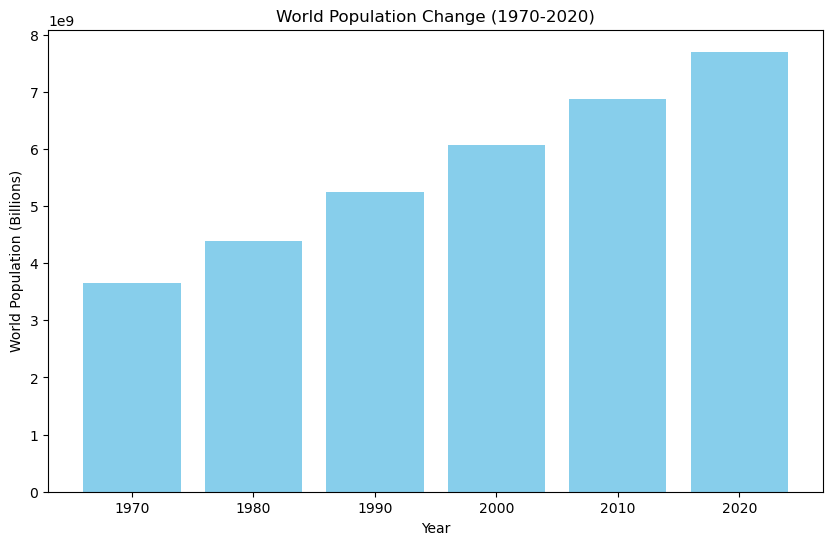

In [72]:
plt.figure(figsize=(10, 6)) # we create a new figure object and set the width and height of the figure in inches 
plt.bar(overall_population_df.index, # we specify what is used for the x-axis values
        overall_population.values, # we specify what is used for the y-axis values
        color='skyblue') # setting the color

# let's modify the details and then we can show the graph
plt.title('World Population Change (1970-2020)') # setting the title
plt.xlabel('Year') # setting the label for the x-axis 
plt.ylabel('World Population (Billions)') # setting the label for the y-axis

plt.show() # showing the graph

A clear tendency is shown, there is a growth in population, more precisely:

In [76]:
def population_growth(start_year, end_year):

    population_start_year = overall_population[start_year]
    population_end_year = overall_population[end_year]
    
    population_change = population_end_year - population_start_year
    change_rate = ((population_change / population_start_year) * 100).round(1)

    print(f'Between {start_year} and {end_year} world population grew from {population_start_year:,.0f} to {population_end_year:,.0f}: a {population_change:,.0f} increase') 
    print(f'In percentage points world population increased by {change_rate}%')

population_growth('1970', '2020')

Between 1970 and 2020 world population grew from 3,655,925,295 to 7,699,852,366: a 4,043,927,071 increase
In percentage points world population increased by 110.6%


Note that in the defined function `population_growth` we did not need to establish whether population experienced an increase or a decrease, since we noticed in the bar graph above that there were no downward periods for the time span studied. If that was not the case, we would have first needed to establish whether throughout the called time period there was an increase or a decrease and then modify the two print statements accordingly.

Let's dive more into our data focusing on the different continents: Africa, Asia, Europe, North America, Oceania and South America.

We use the `pandas` method `.groupby()` to group together the unique values found under the selected column, in our case the one named "Continent", meaning that all the rows with the same continent will be grouped together. We use again `.sum()` to sum all the numerical columns within each group.

Even though in this section we are just focusing on population, we group by continent using the DataFrame with information on CO2 emissions as well, since it is something that will come in handy in the next sections.

In [79]:
by_continent = (population_emissions.drop(columns=['CCA3', 'Country'])).groupby('Continent').sum() # grouping by continent
by_continent.reset_index(inplace=True) # resetting the index

by_continent

,Continent,1970 Population,1970 CO2 Emissions (Tons),1980 Population,1980 CO2 Emissions (Tons),1990 Population,1990 CO2 Emissions (Tons),2000 Population,2000 CO2 Emissions (Tons),2010 Population,2010 CO2 Emissions (Tons),2020 Population,2020 CO2 Emissions (Tons)
0,Africa,338342169,5159824046,444577851,9273370366,587688584,15663111652,750125640,23284009443,962865593,33843465394,1234748634,47004768430
1,Asia,2144104985,38492962670,2634446672,75814688751,3209455244,130151140468,3733779348,211607981066,4218395544,339363477558,4661110257,533287708767
2,Europe,645843654,193655314470,681944150,262964378195,709681182,337934859209,715504505,402283353161,724763370,464065671714,734849511,518757627497
3,North America,315336567,166396111589,368145510,221131546904,421062956,276364138483,485834456,341040054179,542454399,412892705825,593951076,477975322344
4,Oceania,19353038,3760722236,22757808,5807552458,26508070,8558583959,30922356,12065443549,36827556,16419174201,43666592,20981298197
5,South America,192944882,5889307094,241786766,10139526730,297144083,15443381517,349631202,22655336106,393075063,31898091071,431526296,43288718797


Now that we have our starting DataFrame combining both population and CO2 emissions data, we can focus only on population data.

We use a variety of `pandas` methods: we have already used and described `.copy()` and `.rename_axis()`, instead `.set_index()` is used to set a column in a DataFrame as its index, whereas `.transpose()` is used to exchange the rows with the columns in a DataFrame. In our case, the DataFrame to take in consideration is *by_continent*.

In [117]:
by_continent_population = by_continent.copy() # making a deep copy of the DataFrame by_continent

by_continent_population.set_index('Continent', inplace=True) # the column "Continent" in by_continent_population becomes the new index
by_continent_population = by_continent_population.transpose() # transposing the DataFrame
by_continent_population.drop(['1970 CO2 Emissions (Tons)', '1980 CO2 Emissions (Tons)', # we drop the columns regarding CO2 emissions
                              '1990 CO2 Emissions (Tons)', '2000 CO2 Emissions (Tons)',
                              '2010 CO2 Emissions (Tons)', '2020 CO2 Emissions (Tons)'], inplace=True)
by_continent_population.index = [year[:4] for year in by_continent_population.index] # we modify the existing index considering only the first four characters in each index label
by_continent_population.rename_axis(None, axis=1, inplace=True) # removing the name of the columns

by_continent_population

,Africa,Asia,Europe,North America,Oceania,South America
1970,338342169,2144104985,645843654,315336567,19353038,192944882
1980,444577851,2634446672,681944150,368145510,22757808,241786766
1990,587688584,3209455244,709681182,421062956,26508070,297144083
2000,750125640,3733779348,715504505,485834456,30922356,349631202
2010,962865593,4218395544,724763370,542454399,36827556,393075063
2020,1234748634,4661110257,734849511,593951076,43666592,431526296


We repeat the same process to get a DataFrame with the same structure with data about CO2 emissions, as we said, we are going to need this later.

In [118]:
by_continent_emissions = by_continent.copy()

by_continent_emissions.set_index('Continent', inplace=True)
by_continent_emissions = by_continent_emissions.transpose()
by_continent_emissions.drop(['1970 Population', '1980 Population', # this time we drop the columns regarding population
                             '1990 Population', '2000 Population',
                             '2010 Population', '2020 Population'], inplace=True)
by_continent_emissions.index = [year[:4] for year in by_continent_emissions.index]
by_continent_emissions.rename_axis(None, axis=1, inplace=True)

by_continent_emissions

,Africa,Asia,Europe,North America,Oceania,South America
1970,5159824046,38492962670,193655314470,166396111589,3760722236,5889307094
1980,9273370366,75814688751,262964378195,221131546904,5807552458,10139526730
1990,15663111652,130151140468,337934859209,276364138483,8558583959,15443381517
2000,23284009443,211607981066,402283353161,341040054179,12065443549,22655336106
2010,33843465394,339363477558,464065671714,412892705825,16419174201,31898091071
2020,47004768430,533287708767,518757627497,477975322344,20981298197,43288718797


Now we can start to analyze data regarding population focusing on the six continents.

First, let's define a dictionary with the chosen colors for each continent, which we will use throughout the research.

The dictionary `continent_colors` has the following structure:

- Keys: strings that represent the names of the six continents
- Correspondent values: strings representing colors in hex format where each is associated to a single continent 

In [119]:
continent_colors: dict[str, str] = {'Africa': '#FF7F50',
                                    'Asia': '#FF0000',
                                    'Europe': '#0000FF',
                                    'North America': '#FFD700',
                                    'South America': '#DAA520',
                                    'Oceania': '#00CED1'}

The code to display the following linear graph results similar as for the code used to show the bar graph above, in fact, it still relies on the same libraries/modules.

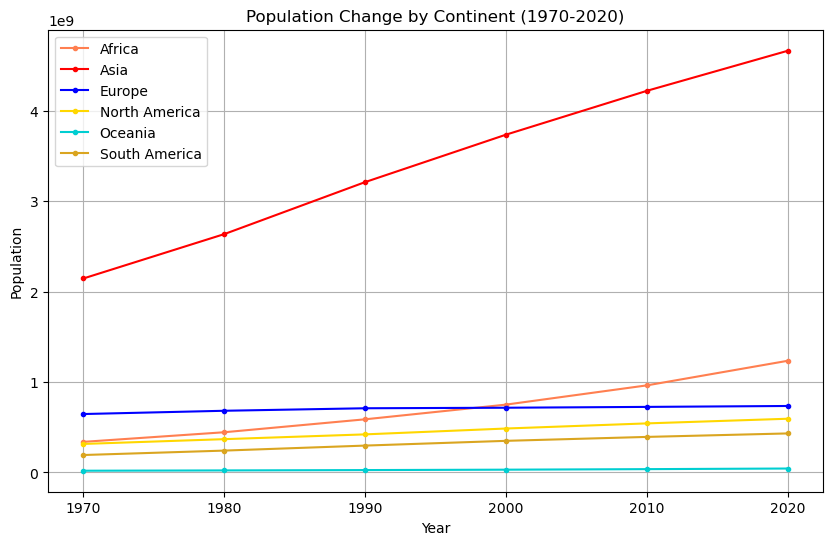

In [121]:
plt.figure(figsize=(10, 6))

# the for loop iterates over each column (continent) in the DataFrame, plotting a separate line graph for each continent 
for continent in by_continent_population.columns:
    plt.plot(by_continent_population.index, # x-axis
             by_continent_population[continent], # y-axis
             label=continent, # this creates a label for each iteration (continent), it is used in the legend
             color=continent_colors.get(continent), # this uses the previously declared dictionary and the continent as key 
             marker='.') # this specifies to use dots as markers

plt.title("Population Change by Continent (1970-2020)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend() # this command shows the legend
plt.grid(True) # this command enables the grid in the plot, enhancing readabilty

plt.show()

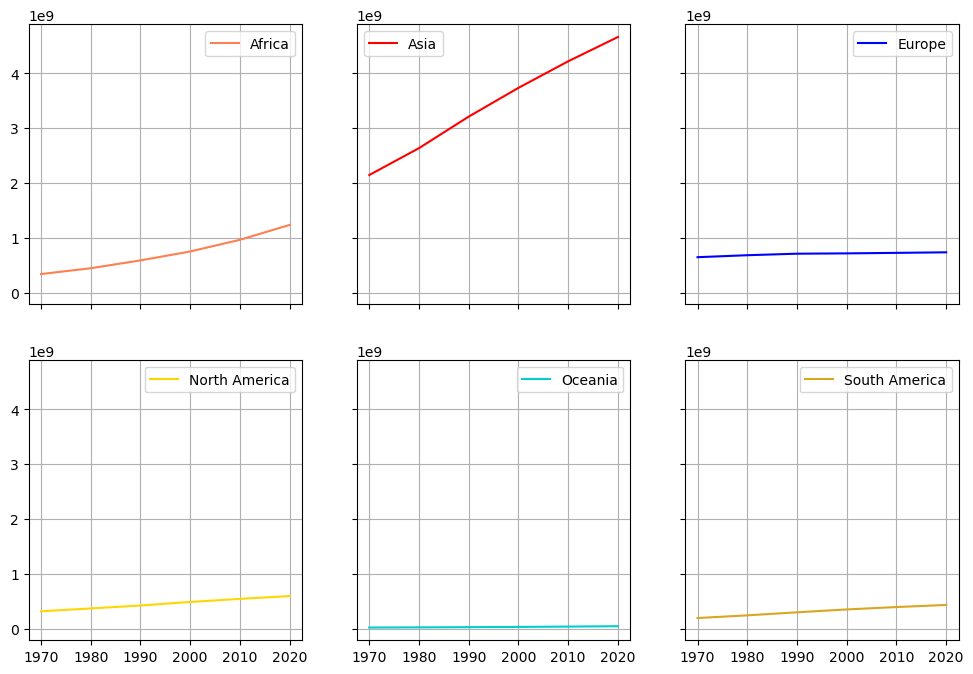

In [122]:
plot = by_continent_population.plot(subplots=True, # this specifies that each column in the specified DataFrame should be plotted in a separate subplot 
                                    layout=(2, 3), # this specifies a grid of 2 rows and 3 columns
                                    figsize=(12, 8),
                                    sharey=True,
                                    grid=True,
                                    color=continent_colors)

A steeper line, such as the ones for Africa or Asia, indicates a higher population growth, whereas a flatter line, like the ones for Europe, North America, Oceania and South America, indicates a lower population growth. 

Since in the y-axis we have billions, the graphs shown do not help us to understand the true population changes for continents that have less population, for some we can barely notice any difference throughout our time span studied, this is the case for Europe, North America, Oceania and South America.

It's important to note that we could have set `sharey=` to `False` so that each graph had its own y-axis based on the values on the different columns, however, we are going to display single graphs for a neater result without having a scientific notation on the y-axis, while formatting the y-axis to include commas as thousand separators. 

We define the function `line_chart` with four parameters:

1. *df*: the DataFrame with the data to use
2. *continent_country*: the continent or country we want to take in consideration
3. *colors*: the dictionary with the chosen colors for each continent or country
4. *kind*: either Population, CO2 Emissions (Tons) (see Section 2.2) or Life Expectancy (see Section 2.3)

Libraries/modules needed to define the function:

- the `pandas` library imported as `pd`
- the `graph_objects` module imported as `go` from the `plotly` library

In [127]:
def line_chart(df, continent_country, colors, kind):

    continent_country_data = df[continent_country] # we create a new DataFrame extracting data only for the specified continent or country

    fig = go.Figure() # creating a new plotly figure object

    fig.add_trace(go.Scatter(
        x = df.index,  # years as the x-axis values
        y = continent_country_data,  # population values for the continent/country as the y-axis values
        mode = 'lines+markers', # setting the mode for the graph, showing both lines and markers
        marker = dict(color=colors), # setting the color depending on the specified continent or country
        hoverinfo = 'y' # setting the hover info to display only the exact value coming from the y-axes
    ))
    
    # modifying the details 
    fig.update_layout(
        title = f"{kind} Change in {continent_country} (1970-2020)", # setting the title
        xaxis_title = "Year", # setting the title for the x-axis
        yaxis_title = f"{kind}", # setting the title for the y-axis
        yaxis=dict(tickformat=","), # formatting the y-axis to include commas as thousand separators
    )

    fig.show()

Let's call the function with the wanted parameters.

In [128]:
line_chart(by_continent_population, 'Europe', continent_colors['Europe'], "Population")
line_chart(by_continent_population, 'North America', continent_colors['North America'], "Population")
line_chart(by_continent_population, 'Oceania', continent_colors['Oceania'], "Population")
line_chart(by_continent_population, 'South America', continent_colors['South America'], "Population")

We would like to see the percentage of each continent's population out of the total world population for our starting and ending years: 1970 and 2020.

We define another function, `pie_chart`, with three parameters:

1. *df*: the DataFrame with the data to use
2. *year*: the year we want to take in consideration
3. *kind*: either Population or CO2 Emissions (Tons) (see Section 2.2)

Inside the function we rely on the `pandas` attribute `.loc[]`, which lets us access by default to one or more specified index labels. In this case we use it to access to the row corresponding to the year given as a parameter when the function is called.

The code still relies on the the same libraries/modules needed to define the function `line_chart`.

In [131]:
def pie_chart(df, year, kind):
    
    data_year = df.loc[str(year)] # we create a new DataFrame extracting data for the specified year
    custom_colors = [continent_colors[continent] for continent in data_year.index] # creating a list with the colors that match in order the continents in data_year
    
    fig = go.Figure(data=[go.Pie(labels=data_year.index, # setting the labels of the pie chart as the six continents
                                 values=data_year.values, # setting the values of the pie chart as the data on population or CO2 emissions 
                                 marker=dict(colors=custom_colors), # applying the colors to each continent
                                 textinfo='percent', # we specify that percentage values will be displayed in the pie chart
                                 hoverinfo='label+value+percent', # setting the hover info
                                 hole=0.2)]) # we create a hole in the center for aesthetic
    
    fig.update_layout(
        title_text=f'Distribution of {kind} Percentage by Continent in {year}' # in this case we only need to set the title
    )
    
    fig.show()

In [132]:
pie_chart(by_continent_population, 1970, 'Population')
pie_chart(by_continent_population, 2020, 'Population')

To finally adress our first question, let's dig into a final aspect.

We would like to dispaly a choropleth map, which will show the countries studied in a world map with different colors depending on a variable. In our context the variable considered will be either population or CO2 emissions distribution across the world for a given year, where in both cases a darker shade will represent a higher value. 

First, it is useful to get a general idea about the final result we want to obtain before defining the function that displays the conclusive map. To achieve this we rely on the `geopandas` library and we will display population distribution of the studied set of countries as of 1970.

We remember from Part 1 Section 1.1 that in the current working directory there was a file named "maps", most likely a folder. Let's check the files inside it.

In [133]:
files_in_maps = os.listdir('maps')
print(files_in_maps)

['.DS_Store', 'ne_110m_admin_0_countries']


Checking again inside "ne_110m_admin_0_countries".

In [134]:
files_in_ne = os.listdir('maps/ne_110m_admin_0_countries')
print(files_in_ne)

['ne_110m_admin_0_countries.shx', 'ne_110m_admin_0_countries.shp', 'ne_110m_admin_0_countries.cpg', 'ne_110m_admin_0_countries.VERSION.txt', 'ne_110m_admin_0_countries.dbf', 'ne_110m_admin_0_countries.README.html', 'ne_110m_admin_0_countries.prj']


We found the shapefile we need to import, it is named "ne_110m_admin_0_countries.shp".

By using the `os.path.join()` method from the `os.path` module we are able to join together the specified strings to get the final path of a specific file. Instead, the `gpd.read_file()` function from the `geopandas` library is used to read and import the shapefile and assign it to a variable.

In [135]:
path_to_world = os.path.join('maps', 'ne_110m_admin_0_countries', 'ne_110m_admin_0_countries.shp')
world = gpd.read_file(path_to_world)

Let's get a preview of the shapefile and show some of its information, we need to find the column containing the three letters codes for each country.

In [136]:
world.head(5)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Checking the type of our variable `world`.

In [137]:
print(type(world))

<class 'geopandas.geodataframe.GeoDataFrame'>


We have seen how there are a total of 169 columns in the GeoDataFrame, let's print the first 20.

In [138]:
for column in world.columns[:20]:
    print(column)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG


In the preview above we were able to notice that the column named "SOV_A3" contained the three letters codes for each country, however, we also noticed a discrepancy in row number 4, with the code of the US being "US1", while the correct one would have been "USA".

Let's try to get a preview of the next column containing a number 3 in its name, "ADM0_3".

In [139]:
print(world['ADM0_A3'])

0      FJI
1      TZA
2      SAH
3      CAN
4      USA
      ... 
172    SRB
173    MNE
174    KOS
175    TTO
176    SDS
Name: ADM0_A3, Length: 177, dtype: object


It seems we have finally found the column we needed, we can continue.

Libraries/modules needed to create and display the choropleth map:

- the `pandas` library imported as `pd`
- the `pyplot` module imported as `plt` from the `matplotlib` library
- the `geopandas` library imported as `gpd`

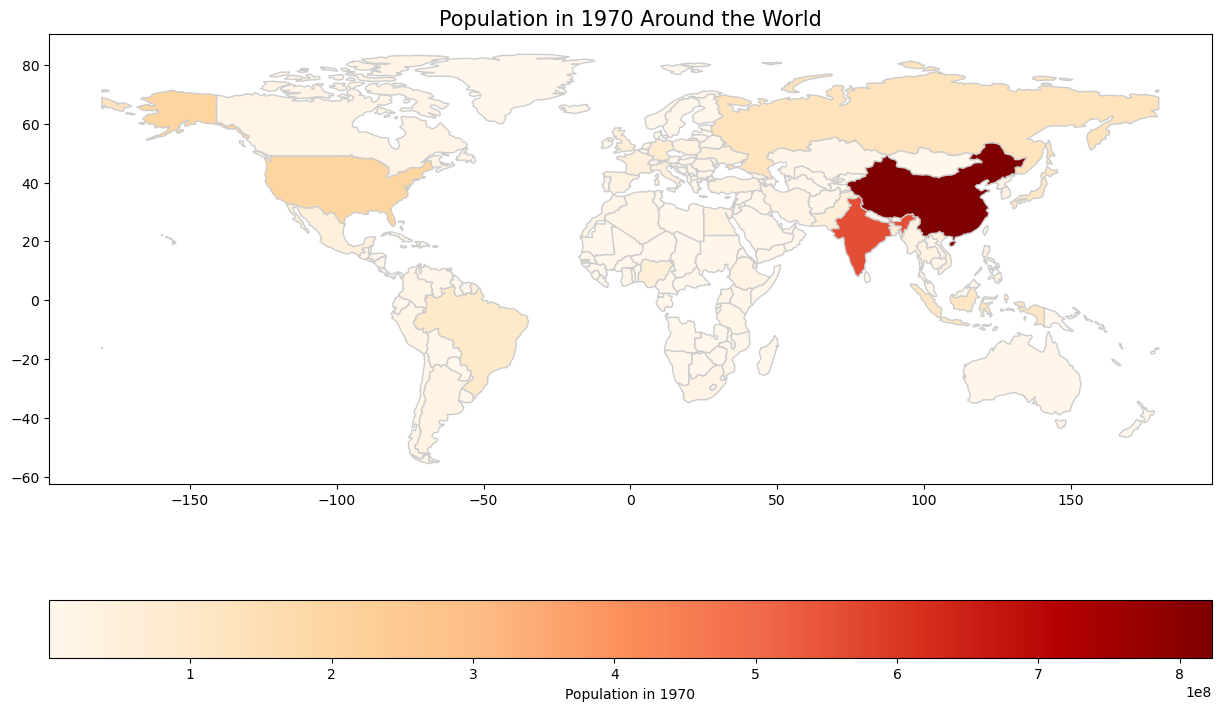

In [140]:
# we merge the DataFrame population3 and the GeoDataFrame world 
merged_data = world.merge(population3[['CCA3', '1970 Population']], # we select only two columns from population3
                          left_on='ADM0_A3', # this specifies the column in the GeoDataFrame to use as key
                          right_on='CCA3', # this specifies the corresponding column in the DataFrame to use 
                          how='left') # all rows from the GeoDataFrame world will be kept, if there is no match with the DataFrame population3 the resulting DataFrame will a NaN value 

fig, ax = plt.subplots(figsize=(15, 10)) # creating a figure and a single axes

merged_data.plot(column='1970 Population', # here we specify the column used to populate the map
                 cmap='OrRd', # defining the colormap
                 ax=ax, # here it is specified that the choropleth map is drawn in the axes we created
                 edgecolor='0.8', # setting the color of the borders
                 legend=True, # adding the legend
                 legend_kwds={'label': "Population in 1970", # setting the label for the legend
                              'orientation': "horizontal"}) # setting the orientation for the legend

ax.set_title('Population in 1970 Around the World', # setting the title for the map
             fontdict={'fontsize': 15}) # modifying the size of the title

plt.show()

At last, we have an idea about the final result we would like to obtain, we now use different libraries/modules to display the same map but interactive.

We define the function `choropleth_map` with three parameters:

1. *df*: the DataFrame with the data to use in the map
2. *year*: the year we want to take in consideration
3. *kind*: either Population or CO2 Emission (Tons) (see Section 2.2)

In this case, the libraries/modules needed are not as many, for instance:

- the `pandas` library imported as `pd`
- the `plotly.express` module imported as `px` from the `plotly` library

In [141]:
def choropleth_map(df, year, kind):
    
    # determining the column name which will populate the map with its value
    if kind == 'Population':
        column_name = f'{year} Population'
    elif kind == 'CO2 Emission (Tons)':
        column_name = f'{year} CO2 Emissions (Tons)'
    
    data_year = df[['CCA3', 'Country', 'Continent', column_name]] # we create a DataFrame only with the necessary columns
    
    max_value = data_year[column_name].max() # determining the maximum value under the selected column to set the color range 
    
    figure = px.choropleth(data_year, # the DataFrame to use in the map
                           locations = 'CCA3', # we define the column to use for geographic lcoations
                           color = column_name, # we color the map based on the specified column
                           hover_data={'CCA3': False, # setting the hover info
                                       'Country': True,
                                       column_name: True},
                           range_color = [1, max_value], # setting the color scale range
                           color_continuous_scale = "peach", # specifying the color scale
                           title = f"{kind} in {year} Around the World") # setting the title of the map
    figure.show()

In [142]:
choropleth_map(population_emissions, 1970, 'Population')
choropleth_map(population_emissions, 2020, 'Population')

The trend is finally more apparent, we have every piece of information needed to adress our first dilemma, so: <span style="color:green">**which were the main changes in world population from 1970 to 2020?**</span>

1. <span style="color:green">Between 1970 and 2020 world population experienced a significant growth, it more than doubled over the 50-year period, growing from approximately 3.7 billion in 1970 to about 7.7 billion in 2020, a staggering 110% increase.</span>
2. <span style="color:green">This upward trend is continuous, both the bar graph about world population and the linear graphs highlighting the trends of the six different continents showed no period of decline throughout the period studied.</span>
3. <span style="color:green">The continent that plays the major role in global population is Asia, as it can be seen in the pie charts displayed, establishing itself as the most populous continent for each decade, growing from over 2 billions in 1970 to 4.6 billions in 2020. However, even though it experienced a 2.6 billion growth, its share in world distribution remained stable over the the period, settling at around 60%.</span>
4. <span style="color:green">As far as it concerns the other five continents, all experienced a positive increase in population without any downward periods. If we consider their shares in world population, Africa showed the highest growth, passing from around 9% in 1970 to 16% in 2020, North America, Oceania and South America did not experience any major change, whereas this is not the case for Europe, which is the only continent that saw a notable decrease, of around 8 percentage points.</span>

Moving on to our second question.

### 2.2 Addressing our second dilemma: Is there a correlation between population and CO2 emissions?

First of all, let's begin Section 2.2 by calling the fuctions defined in Section 2.1, `line_chart`, `pie_chart` and `choropleth_map`; this time with the parameteres useful to get a general overview about the changes in CO2 emissions between 1970 and 2020 for the six continents.

In [143]:
for continent in by_continent_emissions.columns:
    line_chart(by_continent_emissions, continent, continent_colors[continent], 'CO2 Emission (Tons)')

In [144]:
pie_chart(by_continent_emissions, 1970, 'CO2 Emissions')
pie_chart(by_continent_emissions, 2020, 'CO2 Emissions')

In [145]:
choropleth_map(population_emissions, 1970, 'CO2 Emission (Tons)')
choropleth_map(population_emissions, 2020, 'CO2 Emission (Tons)')

A clear tendency is shown, from 1970 to 2020, CO2 emissions have increased significantly across all continents, without any downward periods.

Moreover, from the pie charts displayed we were able to highlight the disparities between changes in population and CO2 emissions across the different continents, with the perfect example being Asia, which kept almost an identical share in world population throughout the 50 years studied, while its share in global CO2 emissions increased by almost 20%.

Now, we previously created a DataFrame with the totals on world population for each year, we repeat the same process to create a DataFrame with the totals on CO2 emisions, the code used is the same.

In [146]:
overall_emissions = emissions4[['1970 CO2 Emissions (Tons)', '1980 CO2 Emissions (Tons)', 
                                '1990 CO2 Emissions (Tons)', '2000 CO2 Emissions (Tons)',
                                '2010 CO2 Emissions (Tons)', '2020 CO2 Emissions (Tons)']].sum()
overall_emissions.index = ['1970', '1980', '1990', '2000', '2010', '2020']
overall_emissions_df = overall_emissions.to_frame(name='World CO2 Emissions (Tons)')

We merge the two DataFrames together. This time we set `left_index=` and `right_index=` to `True` since we now that both DataFrames have the same index. The resulting DataFrame will be merged on the common index values, not on a specified column name, as was the case when we merged in Part 1 Section 1.4.

In [147]:
overall_pop_emi = pd.merge(overall_population_df,
                           overall_emissions_df,
                           left_index=True,
                           right_index=True)
overall_pop_emi

,World Population,World CO2 Emissions (Tons)
1970,3655925295,413354242105
1980,4393658757,585131063404
1990,5251540119,784115215288
2000,6065797507,1012936177504
2010,6878381525,1298482585763
2020,7699852366,1641295444032


Now, to start adressing our second dilemma, we display a scatterplot where on the x-axis there is world population and on the y-axis the totals on world emissions of CO2.

Libraries/modules needed to create and display the scatterplot:

- `pandas` imported as `pd`
- the module `express` imported as `px` from the `plotly` library

In [149]:
fig = px.scatter(overall_pop_emi, # the DataFrame to use 
                 x = 'World Population', # the column to use as values on the x-axis
                 y = 'World CO2 Emissions (Tons)', # the column to use as values on the y-axis
                 title = 'World Population vs CO2 Emissions (Tons)', # setting the title
                 trendline = 'ols', # this adds the trendline to the scatter plot
                )

fig.show()

We repeat the same approach, this time showing data for each continent with different lines.

We define the function `scatterplot` with three parameters:

1. *first_df*: the first DataFrame to use on the x-axis
2. *second_df* the second DataFrame to use on the y-axis
3. *colors*: the dictionary previously declared with the chosen colors for each continent or country
4. *kind1*: factor on the x-axis, either Population, CO2 Emissions (Tons) or Life Expectancy (see Part 2.3)
5. *kind2*: factor on the y-axis, either Population, CO2 Emissions (Tons) or Life Expectancy (see Part 2.3)

In this case, the libraries and modules needed to carry out the code for the function are the same as for the previous scatterplot.

In [150]:
def scatterplot(first_df, second_df, colors, kind1, kind2):
    
    # we need to find whether we are taking in consideration continents or countries
    continent_list: list[str] = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
    for name in first_df.keys(): # iterating over the keys (continents or countries) in the first DataFrame
        if name in continent_list: # if a match is found in continent_list, we enter into the if statement
            category_label = 'Continent' # we are considering continents
            break
    else:
        category_label = 'Country' # if no match is found in continent_list, we are considering countries

    data = pd.DataFrame() # here we define an empty DataFrame     
        
    for name in first_df.keys(): # same as above, iterating over the keys in the first DataFrame
        category_data = pd.DataFrame({ # creating a DataFrame for each iteration 
            kind1: first_df[name], # first column named as kind1, we populate the column with the first DataFrame
            kind2: second_df[name], # second column named as kind2, we populate the column with the second DataFrame
            category_label: name}) # third column named as category_label, we populate the column with a continent or a country
        data = pd.concat([data, category_data], ignore_index=True) # for each iteration it appeands the new DataFrame category_data to data

    fig = px.scatter( # creating the scatterplot using plotly.express
        data, # the DataFrame to use
        x = kind1, # column to use in the x-axis
        y = kind2, # column to ose in the y-axis
        title = f'{kind1} and {kind2} by {category_label}', 
        trendline = "ols",
        color = category_label, # column to use to color the points and the trend line 
        color_discrete_map = colors, # mapping the dictionary to the different continents or countries
        labels = {kind1: kind1, # the x-axis will be labeled as kind1
                  kind2: kind2, # the y-axis will be labeled as kind2
                  category_label: category_label}) # the legend will be labeled as the string category_label

    fig.show()

In [151]:
scatterplot(by_continent_population, by_continent_emissions, continent_colors, 'Population', 'CO2 Emission (Tons)')

Thanks to the two scatterplots displayed it is easier for us to study the correlation between population and CO2 emissions. The trend lines are shown specifically becuase they indicate the general trends of the six continents or of the set of countries (see Section 2.3), instead, the steepness of a trend line reflects the degree of correlation, more precisely, the higher the slope of a line, the stronger the correlation between the two factors considered is.

An additional analysis concerning the scatterplots and the trend lines can be found in Point 3 in the conclusion of this section.

By studying in more detail the percentage changes of population, CO2 emissions and emissions per capita, we are finally able to establish whether there is a direct correlation between the two factors or not. 

We first need to create a new DataFrame regarding emissions per capita.

The `pandas` method `.div()` is used to perform division on a DataFrame, in our case we can divide the DataFrame *by_continent_emissions* with *by_continent_population* since the two have the same structure, they share the same number of columns and rows and contain the same continents in the same exact order, thus it is easy for us to obtain emissions per capita for each continent. We have already seen and used the method `.round()`, the resulting values are approximated as specified.

In [152]:
emissions_per_capita = by_continent_emissions.div(by_continent_population).round(1) # dividing the DataFrames
emissions_per_capita_t = emissions_per_capita.transpose() # transposing
emissions_per_capita_t.reset_index(inplace=True) # we reset the index
emissions_per_capita_t.rename(columns={'index': 'Continent'}, inplace=True) # we rename the 

emissions_per_capita_t

,Continent,1970,1980,1990,2000,2010,2020
0,Africa,15.3,20.9,26.7,31.0,35.1,38.1
1,Asia,18.0,28.8,40.6,56.7,80.4,114.4
2,Europe,299.8,385.6,476.2,562.2,640.3,705.9
3,North America,527.7,600.7,656.3,702.0,761.2,804.7
4,Oceania,194.3,255.2,322.9,390.2,445.8,480.5
5,South America,30.5,41.9,52.0,64.8,81.2,100.3


Note that the index is a series of numbers and the six continents are not set as the index because we wanted to obtain a similar structure as for the DataFrame *by_continent*, this will make the following codes easier to compute.

In [153]:
# we compute the percentage changes in population from 1970 to 2020 for each continent and assign it to a new column in the DataFrame by_continent
by_continent['Population Percentage Change'] = (((by_continent['2020 Population'] - by_continent['1970 Population'])
                                                 / by_continent['1970 Population']) * 100).round(1)
pop_percentage_change = by_continent[['Continent', 'Population Percentage Change']] # creating a new DataFrame only with two columns from by_continent

# we repeat the same process for CO2 emissions
by_continent['CO2 Emissions Percentage Change'] = (((by_continent['2020 CO2 Emissions (Tons)'] - by_continent['1970 CO2 Emissions (Tons)'])
                                                   / by_continent['1970 CO2 Emissions (Tons)']) * 100).round(1)
emi_percentage_change = by_continent[['Continent', 'CO2 Emissions Percentage Change']]

# again for emissions per capita
by_continent['Emissions per Capita Percentage Change'] = (((emissions_per_capita_t['2020'] - emissions_per_capita_t['1970'])
                                                 / emissions_per_capita_t['1970']) * 100).round(1)
capita_percentage_change = by_continent[['Continent', 'Emissions per Capita Percentage Change']]

Now that we obtained three distinctive DataFrames regarding percentage changes we can merge them together.

We use a new `pandas` method we still have not discussed, that is `.sort_values()`, used to sort the values by a specified column. To do so we set the argument `by=` to the wanted column, in this case "Population Percentage Change", instead, we set `ascending=` to `True` since we want the continents sorted by the lowest population percentage change value to the highest.

In [154]:
# merging the the three DataFrames together
percentage_changes = pd.merge(
    pop_percentage_change, 
    emi_percentage_change, 
    on='Continent')
percentage_changes2 = pd.merge(
    percentage_changes, 
    capita_percentage_change, 
    on='Continent')

# sorting the continents in ascending order by population percentage change
percentage_changes2 = percentage_changes2.sort_values(by='Population Percentage Change', ascending=True)
percentage_changes2.reset_index(drop=True, inplace=True)

percentage_changes2

,Continent,Population Percentage Change,CO2 Emissions Percentage Change,Emissions per Capita Percentage Change
0,Europe,13.8,167.9,135.5
1,North America,88.4,187.3,52.5
2,Asia,117.4,1285.4,535.6
3,South America,123.7,635.0,228.9
4,Oceania,125.6,457.9,147.3
5,Africa,264.9,811.0,149.0


Since we added three columns concerning percentage changes in *by_continent*, let's display the final result.

This simple structure of the conclusive DataFrame aggregates data on population, CO2 emissions and percentage changes throughout the period of time studied for the six continents. The structure makes it easy to read and understand all the data available, thus it can be extremely useful to the reader.

In [155]:
by_continent

,Continent,1970 Population,1970 CO2 Emissions (Tons),1980 Population,1980 CO2 Emissions (Tons),1990 Population,1990 CO2 Emissions (Tons),2000 Population,2000 CO2 Emissions (Tons),2010 Population,2010 CO2 Emissions (Tons),2020 Population,2020 CO2 Emissions (Tons),Population Percentage Change,CO2 Emissions Percentage Change,Emissions per Capita Percentage Change
0,Africa,338342169,5159824046,444577851,9273370366,587688584,15663111652,750125640,23284009443,962865593,33843465394,1234748634,47004768430,264.9,811.0,149.0
1,Asia,2144104985,38492962670,2634446672,75814688751,3209455244,130151140468,3733779348,211607981066,4218395544,339363477558,4661110257,533287708767,117.4,1285.4,535.6
2,Europe,645843654,193655314470,681944150,262964378195,709681182,337934859209,715504505,402283353161,724763370,464065671714,734849511,518757627497,13.8,167.9,135.5
3,North America,315336567,166396111589,368145510,221131546904,421062956,276364138483,485834456,341040054179,542454399,412892705825,593951076,477975322344,88.4,187.3,52.5
4,Oceania,19353038,3760722236,22757808,5807552458,26508070,8558583959,30922356,12065443549,36827556,16419174201,43666592,20981298197,125.6,457.9,147.3
5,South America,192944882,5889307094,241786766,10139526730,297144083,15443381517,349631202,22655336106,393075063,31898091071,431526296,43288718797,123.7,635.0,228.9


Coming back to our original bar chart, this relies again on the same libraries/modules used to display the previous two scatterplots.

In [156]:
fig = px.bar(percentage_changes2,
             x = 'Continent', # the column to be used in the x-axis
             y = ['Population Percentage Change', # setting three different columns to be used in the y-axis
                  'CO2 Emissions Percentage Change', 
                  'Emissions per Capita Percentage Change'],
             barmode = 'group', # this groups the bars side by side for better visualization
            ) 

# modifying the details of the graph
fig.update_layout(xaxis_title = 'Continent',
                  yaxis_title = 'Percentage Change',
                  legend_title_text = 'Legend',
                  title = 'Percentage Changes by Continent')

fig.show()

Thanks to the graph displayed above, it is safe for us to assume that there are two major elements that make us believe that population change is not the only factor that contributes to CO2 emissions, these are:

- The fact that across all six continents CO2 emissions tend to increase at a notable higher rate than population
- The fact that there are discrepancies between the two factors, meaning that, since we sorted in ascending order the continents given their population percentage change, if population growth was the mere single element driving and influencing CO2 emissions, we would have noticed an ascending pattern for CO2 emissions percentage change as well, in this case the red bars of the six continents would be ordered similarly

Let's wrap everything that was said and shown throughout Section 2.2, and answer to our original question: <span style="color:blue">**is there a correlation between population and CO2 emissions?**</span>

1. <span style="color:blue">At first, since in the 50-year period considered CO2 emissions increased significantly across all continents, mirroring the growth in population, even if at higher various rates, it would have been easy to immediately assume a direct correlation between the two factors. However, there are several other studies to take in consideration.</span>
2. <span style="color:blue">The first study that makes it difficult to conclude that the only factor influencing CO2 emissions is population growth comes from the comparison of the darkest shades of red in the two choropleth maps showing CO2 emissions and population across the world for a given year. There are several discrepancies easily notable, for instance, if we consider 1970, we can observe how the country with the most CO2 emissions is the United States, whereas the most populated country is China, followed by India. Studying in more detail the two maps showing the two factors it is possible to notice several other diversitites, indicating that a high population does not necessarily correlate to higher values of CO2 emissions.</span>
3. <span style="color:blue">Moreover, the scatterplot that shows the relation between population and CO2 emissions for the six continents reveals a complex correlation; even though emissions increased with population, the different slopes of the trend lines vary a lot, indicating that the rates at which CO2 emissions increase with population change across continents. If that was not the case, if there was a precise direct correlation between the two, we would have most likely noticed a more consistent trend.</span>
4. <span style="color:blue">Lastly, the discrepancies among percentage changes regarding population, CO2 emissions and emissions per capita are proof that population growth is not the sole factor driving CO2 emissions, with other major factors playing a crucial role influencing emissions all over the world. As was the case for the point above, if population growth was, in fact, the only factor we would have expected a more consistent and regular pattern in percentage changes trends.</span>

There is one last question left to answer before coming to a final conclusion on this research, moving on onto Section 2.3.

### 2.3 Addressing our third dilemma: How did life expectancy change in relation to population and CO2 emissions in the three most populated countries as of 2020: China, India and United States?

As mentioned in the introduction, in this part we are only going to focus on the three most populated countries as of 2020, China, India and United States, concentrating on population, CO2 emissions and life expectancy data, studying their relationship.  

First, we want to check the three most populated countries as of 2020, we start with the DataFrame *population_emissions*, containing data on both population and CO2 emissions.

To do so we use again the `pandas` method `.sort_values()`, the argument `by=`, as we have already seen, is used to specify that the sorting should be done based on the given column, "2020 Population". Here the second argument `ascending=` is set to `False` to specify that the sorting should be in descending order, meaning that the highest values come first.

To accomplish the final result we use several other `pandas` methods we have already seen and used.

In [157]:
three_countries_pop_emi = population_emissions.sort_values(by='2020 Population', ascending=False)
three_countries_pop_emi = three_countries_pop_emi.head(3) # we narrow our DataFrame only on the first three rows
three_countries_pop_emi.reset_index(drop=True, inplace=True) # resetting the index
three_countries_pop_emi.drop(columns='CCA3', inplace=True) # we drop the column named "CCA3" 
three_countries_pop_emi.drop(columns='Continent', inplace=True) # we drop the column named "Continent"

# let's display our Data Frame
three_countries_pop_emi

,Country,1970 Population,1970 CO2 Emissions (Tons),1980 Population,1980 CO2 Emissions (Tons),1990 Population,1990 CO2 Emissions (Tons),2000 Population,2000 CO2 Emissions (Tons),2010 Population,2010 CO2 Emissions (Tons),2020 Population,2020 CO2 Emissions (Tons)
0,China,822534450,10470031284,982372466,22647681248,1153704252,43004236475,1264099069,74884032894,1348191368,135000000000,1424929781,236000000000
1,India,557501301,4377963780,696828385,6769264123,870452165,11016840334,1059633675,18939723919,1240613620,31697767327,1396387127,54416488997
2,United States,200328340,154000000000,223140018,202000000000,248083732,249000000000,282398554,304000000000,311182845,364000000000,335942003,417000000000


We are not finished, we can now focus on population and CO2 emissions data separetely, we have already discussed the steps to get to the cleaned final result, ready for us to use for further purposes.

In [158]:
# focusing on population data
three_countries_population = three_countries_pop_emi.copy()

three_countries_population.set_index('Country', inplace=True)
three_countries_population = three_countries_population.transpose()
three_countries_population.drop(['1970 CO2 Emissions (Tons)', '1980 CO2 Emissions (Tons)',
                              '1990 CO2 Emissions (Tons)', '2000 CO2 Emissions (Tons)',
                              '2010 CO2 Emissions (Tons)', '2020 CO2 Emissions (Tons)'], inplace=True)
three_countries_population.index = [year[:4] for year in three_countries_population.index]
three_countries_population.rename_axis(None, axis=1, inplace=True)

# focusing on emissions data
three_countries_emissions = three_countries_pop_emi.copy()

three_countries_emissions.set_index('Country', inplace=True)
three_countries_emissions = three_countries_emissions.transpose()
three_countries_emissions.drop(['1970 Population', '1980 Population',
                                '1990 Population', '2000 Population',
                                '2010 Population', '2020 Population'], inplace=True)
three_countries_emissions.index = [year[:4] for year in three_countries_emissions.index]
three_countries_emissions.rename_axis(None, axis=1, inplace=True)

Let's also modify the structure of *expectancy3*.

In [164]:
three_countries_expectancy = expectancy3.pivot(index='Year',
                                               columns='Country',
                                               values='Life Expectancy')
three_countries_expectancy.rename_axis(None, axis=1, inplace=True)
three_countries_expectancy.rename_axis(None, axis=0, inplace=True)
three_countries_expectancy.index = three_countries_expectancy.index.astype(str)

At last, we now have the three DataFrames sharing the same structure, which we will use throughout this last part of the research, ready for us to call the previously defined functions, these are: 

- *three_countries_expectancy*
- *three_countries_population*
- *three_countries_expectancy*

In [165]:
three_countries_expectancy

,China,India,United States
1970,56.6,48.2,70.8
1980,64.4,53.6,73.6
1990,68.0,58.7,75.2
2000,71.9,62.7,76.6
2010,75.6,66.9,78.5
2020,78.1,70.2,77.3


In [166]:
three_countries_population

,China,India,United States
1970,822534450,557501301,200328340
1980,982372466,696828385,223140018
1990,1153704252,870452165,248083732
2000,1264099069,1059633675,282398554
2010,1348191368,1240613620,311182845
2020,1424929781,1396387127,335942003


In [167]:
three_countries_emissions

,China,India,United States
1970,10470031284,4377963780,154000000000
1980,22647681248,6769264123,202000000000
1990,43004236475,11016840334,249000000000
2000,74884032894,18939723919,304000000000
2010,135000000000,31697767327,364000000000
2020,236000000000,54416488997,417000000000


We define another dictionary, this time with the chosen colors for the three countries, which we will use throughout this last section of the research.

In [168]:
three_countries_colors: dict[str, str] = {'China': '#FF5733',
                                          'India': '#FF9E66',
                                          'United States': '#3357FF'}

Now we can start to analyze the prepared data.

We call the fuction defined in Section 2.1 named `line_chart` to view the changes in life expectancy between 1970 and 2020 for the three countries.

In [169]:
line_chart(three_countries_expectancy, 'China', three_countries_colors['China'], "Life Expectancy")
line_chart(three_countries_expectancy, 'India', three_countries_colors['India'], "Life Expectancy")
line_chart(three_countries_expectancy, 'United States', three_countries_colors['United States'], "Life Expectancy")

Another useful function declared in Section 2.2 is the one named `scatterplot`, since it can help us to study the relationship and notice a correlation between two factors. 

In this case, we call the function two times:

1. First with population on the x-axis and life expectancy on the y-axis
2. Then with CO2 emisssions on the x-axis and life expectancy on the y-axis

In [170]:
scatterplot(three_countries_population, three_countries_expectancy, three_countries_colors, 'Population', 'Life Expectancy')
scatterplot(three_countries_emissions, three_countries_expectancy, three_countries_colors, 'CO2 Emission (Tons)', 'Life Expectancy')

Moreover, if we would like to analyze the relation between our three factors in more depth, it would be optimal to display the data concerning these factors side by side, so it is easier for the reader to look for similar tendencies and discrepancies.

We define the function `comp_exp_pop_emi`, with four parameters:

1. *country*: the country we want to take in consideration
2. *expectancy_df*: the DataFrame regarding life expectancy data
3. *population_df*: the DataFrame regarding population data
4. *emissions_df*: the DataFrame regarding CO2 emissions data

Libraries/modules needed to create and display the following graph:

- `pandas` imported as `pd`
- the module `pyplot` imported as `plt` from the `matplotlib` library

In [171]:
def comp_exp_pop_emi(country, expectancy_df, population_df, emissions_df):
    
    # we create a figure with three axes each with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # plotting the data using the specified DataFrame on the first subplot (axes)
    expectancy_df[[country]].plot(ax=axes[0], 
                                  marker='.',  
                                  color='royalblue',
                                  title='Life Expectancy')
    axes[0].grid(True) # we display the grid for better visualization
    axes[0].tick_params(axis='x', rotation=45) # we rotate the names of the x-axis for better visualization
    
    # plotting the data on the second subplot (axes)
    population_df[[country]].plot(ax=axes[1], 
                                  marker='.', 
                                  color='forestgreen', 
                                  title='Population')
    axes[1].grid(True)
    axes[1].tick_params(axis='x', rotation=45)
    
    # plotting the data on the third and last subplot (axes)
    emissions_df[[country]].plot(ax=axes[2], 
                                  marker='.',  
                                  color='darkorange', 
                                  title='CO2 Emissions (Tons)')
    axes[2].grid(True)
    axes[2].tick_params(axis='x', rotation=45)

    fig.suptitle(f'{country}', fontsize=18)
    
    plt.show()

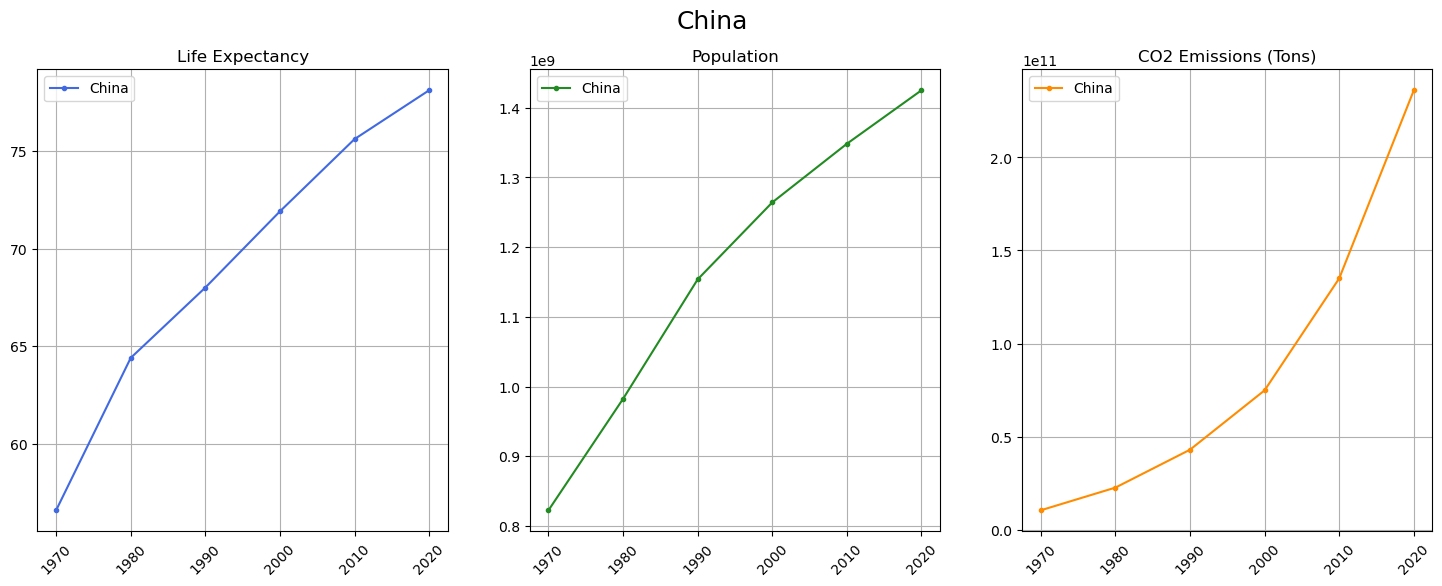

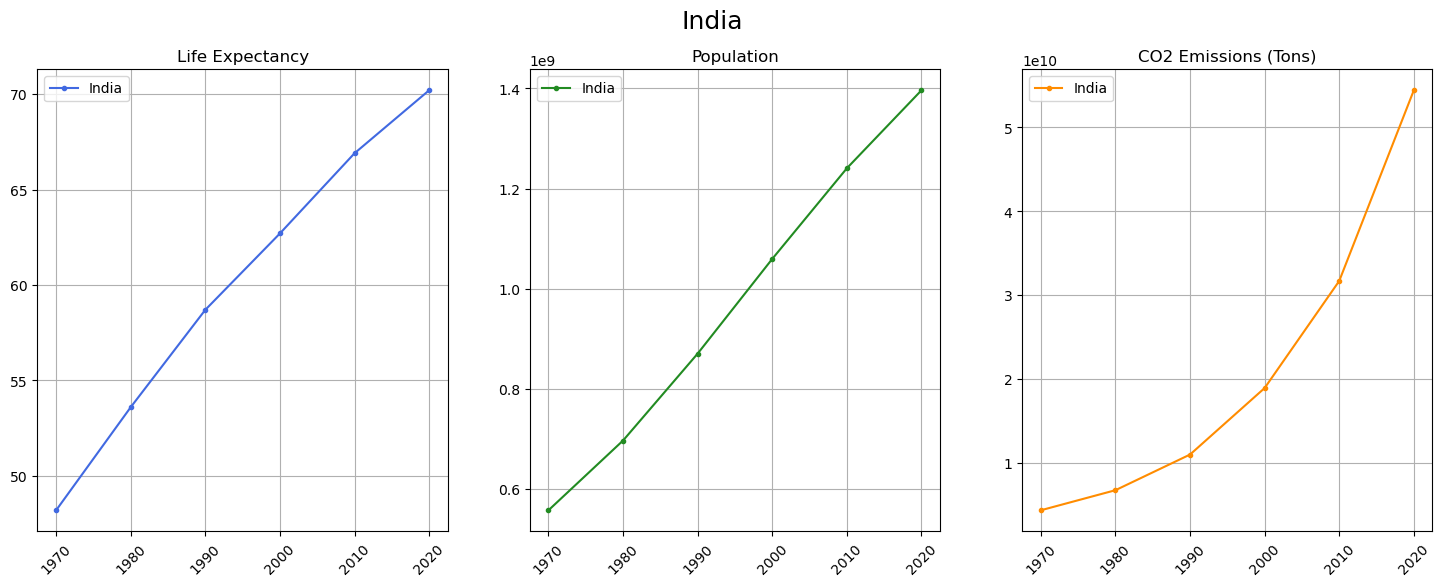

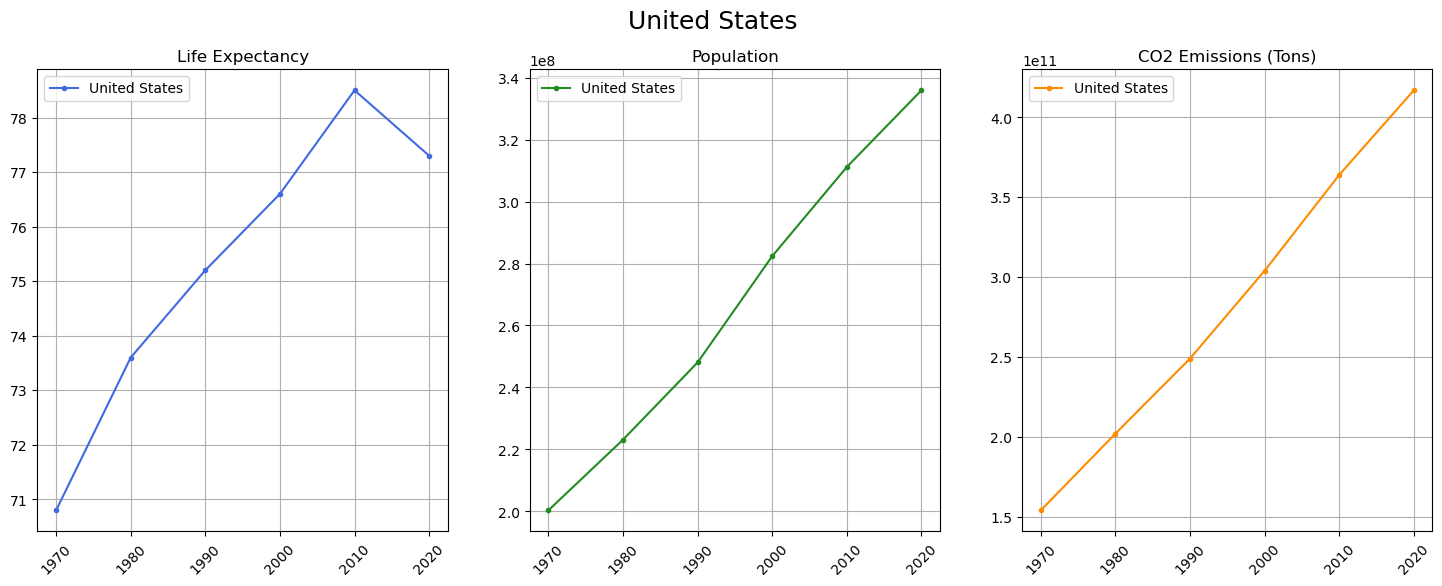

In [172]:
comp_exp_pop_emi('China', three_countries_expectancy, three_countries_population, three_countries_emissions)
comp_exp_pop_emi('India', three_countries_expectancy, three_countries_population, three_countries_emissions)
comp_exp_pop_emi('United States', three_countries_expectancy, three_countries_population, three_countries_emissions)

Lastly, by creating a correlation matrix we are able to further study and analyze the correlation among life expectancy, population and CO2 emissions, helping us to understand their overall relationship and mutual influence.

We define another function, `correlation_matrix`, with four parameters:

1. *country*: the country we want to take in consideration
2. *expectancy_df*: the Data Frame regarding life expectancy data
3. *population_df*: the Data Frame regarding population data
4. *emissions_df*: the Data Frame regarding CO2 emissions data

Inside the function we use the `pandas` method `.corr()`, which is used to compute correlation coefficients for each pair of columns in a specified DataFrame.

Libraries/modules needed to define the function:

- `pandas` imported as `pd`
- `seaborn` imported as `sns`
- `numpy` imported as `np`
- the module `pyplot` imported as `plt` from the `matplotlib` library

In [122]:
def correlation_matrix(country, expectancy_df, population_df, emissions_df):

    country_df = pd.DataFrame(index=expectancy_df.index) # creating an empty DataFrame with the same index as expectancy_df
    country_df['CO2 Emissions'] = emissions_df[country] # this adds a column with CO2 emissions data
    country_df['Population'] = population_df[country] # this adds a column with population data
    country_df['Life Expectancy'] = expectancy_df[country] # this adds a column with life expectancy data
    
    country_correlation_matrix = country_df.corr() # creating a new DataFrame containing correlation coefficients
        
    plt.figure(figsize=(8, 6))
    sns.heatmap(country_correlation_matrix, # the DataFrame to use
                annot=True, # each cell in the matrix will its correlation value
                cmap='coolwarm', # the colormap to use
                vmin=0.8, # minimum value in the colormap
                vmax=1) # maximum value in the colormap
    plt.title(f'{country} Correlation Matrix: Life Expectancy, Population and CO2 Emissions')
    
    plt.show()

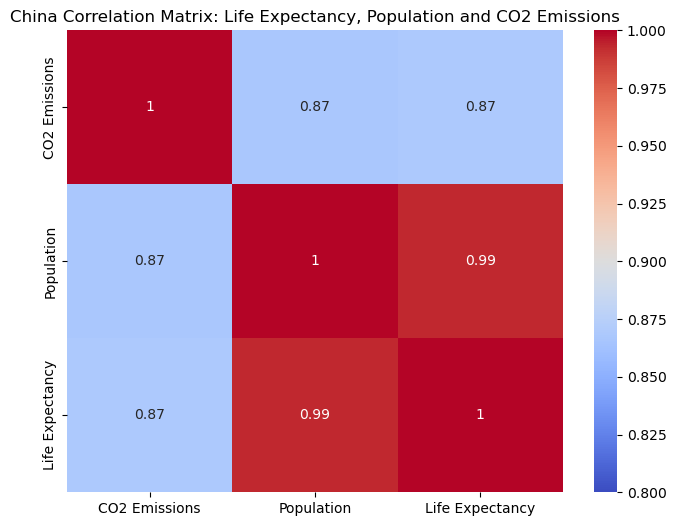

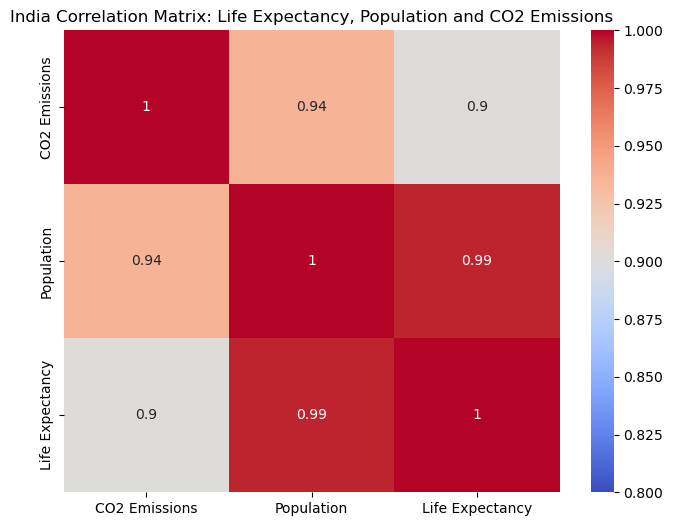

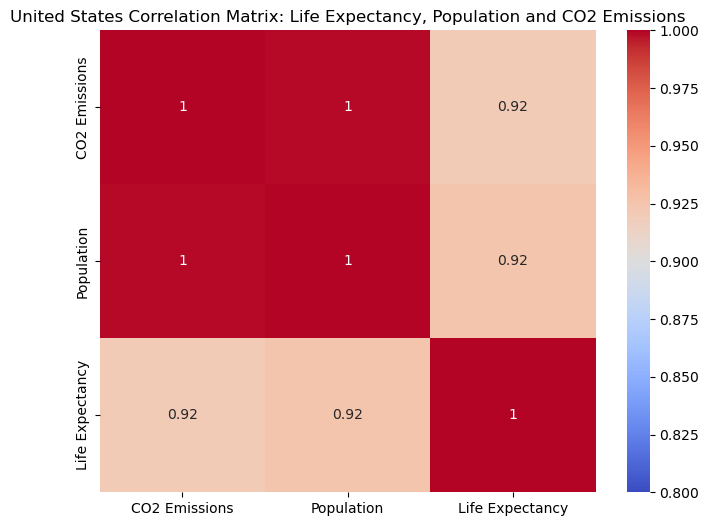

In [123]:
correlation_matrix('China', three_countries_expectancy, three_countries_population, three_countries_emissions)
correlation_matrix('India', three_countries_expectancy, three_countries_population, three_countries_emissions)
correlation_matrix('United States', three_countries_expectancy, three_countries_population, three_countries_emissions)

The higher the value the higher the correlation among two variables. Considering the diagonal elements starting from the top-left going to the bottom-right, these show the highest correlation possible with a value of 1, since each variable is perfectly correlated with itself.

A further analysis concerning the three correlation matrices is found in Point 6 in the conclusion of this last section of the research, which can be found here below.

This being said, after this series of graphs and a variety of information, we can finally address our third and last dilemma: <span style="color:orange">**how did life expectancy change in relation to population and CO2 emission in the three most populated countries as of 2020: China, India and United States?**</span>

1. <span style="color:orange">All three countries studied experienced significant improvements, more precisely, life expectancy in China went from around 60 years in 1970 up to approximately 78 years in 2020, India passed from 50 to 70 years, whereas United States started from 71 and peaked at around 79 years in 2010, while from 2010 to 2020 life expectancy went down to around 77, the only downward period.</span>
2. <span style="color:orange">Moreover, it is important to notice that China and India started at lower levels of life expectancy but were able to make substantial improvements, India approached the level of the US whilst China was even able to surpass it, whereas the US already had a high level of life expectancy in 1970, but showed less improvements.</span>
3. <span style="color:orange">Talking about the correlation among the three factors, improvements in life expectancy in the three countries were matched by increases in population as well as more CO2 emissions, as it can be seen in the scatterplots displayed, however it is difficult for us to establish a direct correlation..</span>
4. <span style="color:orange">From the scatterplot that studies life expectancy and population it is noticeable that China, India and the US experienced different trends but the overall direction is the same. This is especially true if we consider life expectancy and population concerning China and India, with their trend lines being somehow similar, perhaps due to the fact that the two countries are geographically near to each other, however, this is not a topic considered and studied given the objectives of the research itself.</span>
5. <span style="color:orange">Another key point that can be seen is the fact that as China and India approached the level of life expectancy of the US, their trend lines and the respective steepnesses became more similar as the one of the US, perhaps suggesting that as countries achieve higher levels of life exepctancy the relation between population and life expectancy becomes more similar and conistent, however, this is something that we will be able to verify in the future, when we will have other data on the three countries.</span>
6. <span style="color:orange">The three correlation matrices displayed support the evidence of a strong direct correlation between the three factors. However, we can also assume that the results may be biased since we did not cover other important factors in the research, thus, a high value in a correlation matrix between two of the three factors, resulting from an increase in both of them preclude, the existence and involvment of several other influences.</span>

----

### Part 3 Conclusion

Over the course of the research, every point was studied and analyzed to address our three original answers and conclude our goals. In this final part it is possible to find a final conclusion with a brief overview and summary of everything that has been stated and discussed above. 

After having installed and imported all the necessary libraries and modules, we imported the datasets. The structures of the DataFrames obtained were a good starting point but not enough, thus we passed onto Part 1 of the research, were we cleaned and prepared the DataFrames to arrive at the wanted results.  

Moving on onto the main core of the research, Part 2. We started with Section 2.1 by computing world population for the studied years and were able to compute the changes from 1970 to 2020, showing an overall increase of more than 4 billion across the 50-year period considered, a 110.6% increase. We grouped data by continent and studied the changes in population separetely by using a variety of graphs, and at the end we summarized everything thanks to a simple yet effective interactive choropleth map. We were able to answer to our first dilemma, which were the main change in world population from 1970 to 2020?

Moving on onto Section 2.2, is there a correlation between population and CO2 emissions? We tried to establish a correlation between these two factors mainly by analyzing the two in a scatterplot and by computing percentage changes, arriving at the final conclusion for which even though CO2 emissions and population both increased throughout the period, their overall relation is extremely complicated. If we consider data divided and grouped by continent, there are several discrepancies between trend lines and percentage changes, thus we established that population growth is not, and never was, the sole factor driving CO2 emissions, with other major factors playing a crucial role.

At last, there was only a single dilemma left to answer, in Section 2.3 we asked ourselves and adressed the third question, how did life expectancy change in relation to population and CO2 emissions in the three most populated country as of 2020: China, India and United States? Given that in this case there were three variables involved, determining a correlation was even harder. We first started with simply analyzing the changes in life expectancy for the three countries using some of the functions defined in the previous sections. All experienced improvements, with the only downward period being in the US between 2010 and 2020. Returning to the correlation study, we displayed another scatterplot and another new type of table, a correlation matrix, to study the relation among the factors. We arrived at the final conclusion, similar to the one in Section 2.2, for which there are discrepancies among the three factors between the three countries. Altough the general direction is the same, that is, life expectancy improvements were matched by increases in population as well as more CO2 emissions, we added that some results may be biased, since, as we stated multiple times over the course of the research, we did not cover other important elements.